**Column Details:**
- **Booking_ID**: Unique identifier for each booking.
- **no_of_adults**: Number of adult guests in the booking.
- **no_of_children**: Number of child guests in the booking.
- **no_of_weekend_nights**: Nights stayed over the weekend.
- **no_of_week_nights**: Nights stayed during weekdays.
- **type_of_meal_plan**: Type of meal plan selected (if any).
- **required_car_parking_space**: Whether a car parking space was requested (1 = yes, 0 = no).
- **room_type_reserved**: Type of room reserved for the booking.
- **lead_time**: Number of days between booking and check-in date.
- **arrival_year**: Year of arrival.
- **arrival_month**: Month of arrival.
- **arrival_date**: Day of the month the guest is scheduled to arrive.
- **market_segment_type**: Source channel through which the booking was made.
- **repeated_guest**: Indicates if the guest has booked previously (1 = yes, 0 = no).
- **no_of_previous_cancellations**: Count of past cancellations made by the guest.
- **no_of_previous_bookings_not_canceled**: Number of prior bookings completed by the guest.
- **avg_price_per_room**: Average price per room per night.
- **no_of_special_requests**: Number of special service requests made.
- **booking_status**: Final status of the booking (Canceled or Not_Canceled).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
# Checking for missing values
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [12]:
# checking for any duplicate rows
print(df.duplicated().any())

False


In [23]:
# Let's separate categorical and numerical columns
col = df.dtypes == 'object'
obj_cols = (col[col] == True).index
col = df.dtypes != 'object'
num_cols = (col[col] == True).index
print("Categorical columns are: ", list(obj_cols))
print("Numerical columns are: ", list(num_cols))

Categorical columns are:  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical columns are:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [25]:
# Let's find all the unique values of all the categorical columns
for col in obj_cols:
  print(f'{col} : {df[col].unique()} : {len(df[col].unique())}')

Booking_ID : ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275'] : 36275
type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] : 4
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] : 7
market_segment_type : ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] : 5
booking_status : ['Not_Canceled' 'Canceled'] : 2


* From above we can say that Booking_ID is hardly of any use, we can consider removing it
* Other columns also gives us a solid understanding of what kind of data we are expecting to work with.
* We have 3 types of meal plan and one "Non Selected" option
* We have a diverse selection of rooms through 1 to 7
* We can also separate the customers based on market segments like Online, Offline, Corporate, Aciationm and Complementary
* At last our target column booking status: cancelled/not cancelled

In [26]:
# Removing Booking_ID col
df.drop('Booking_ID', axis=1, inplace=True)

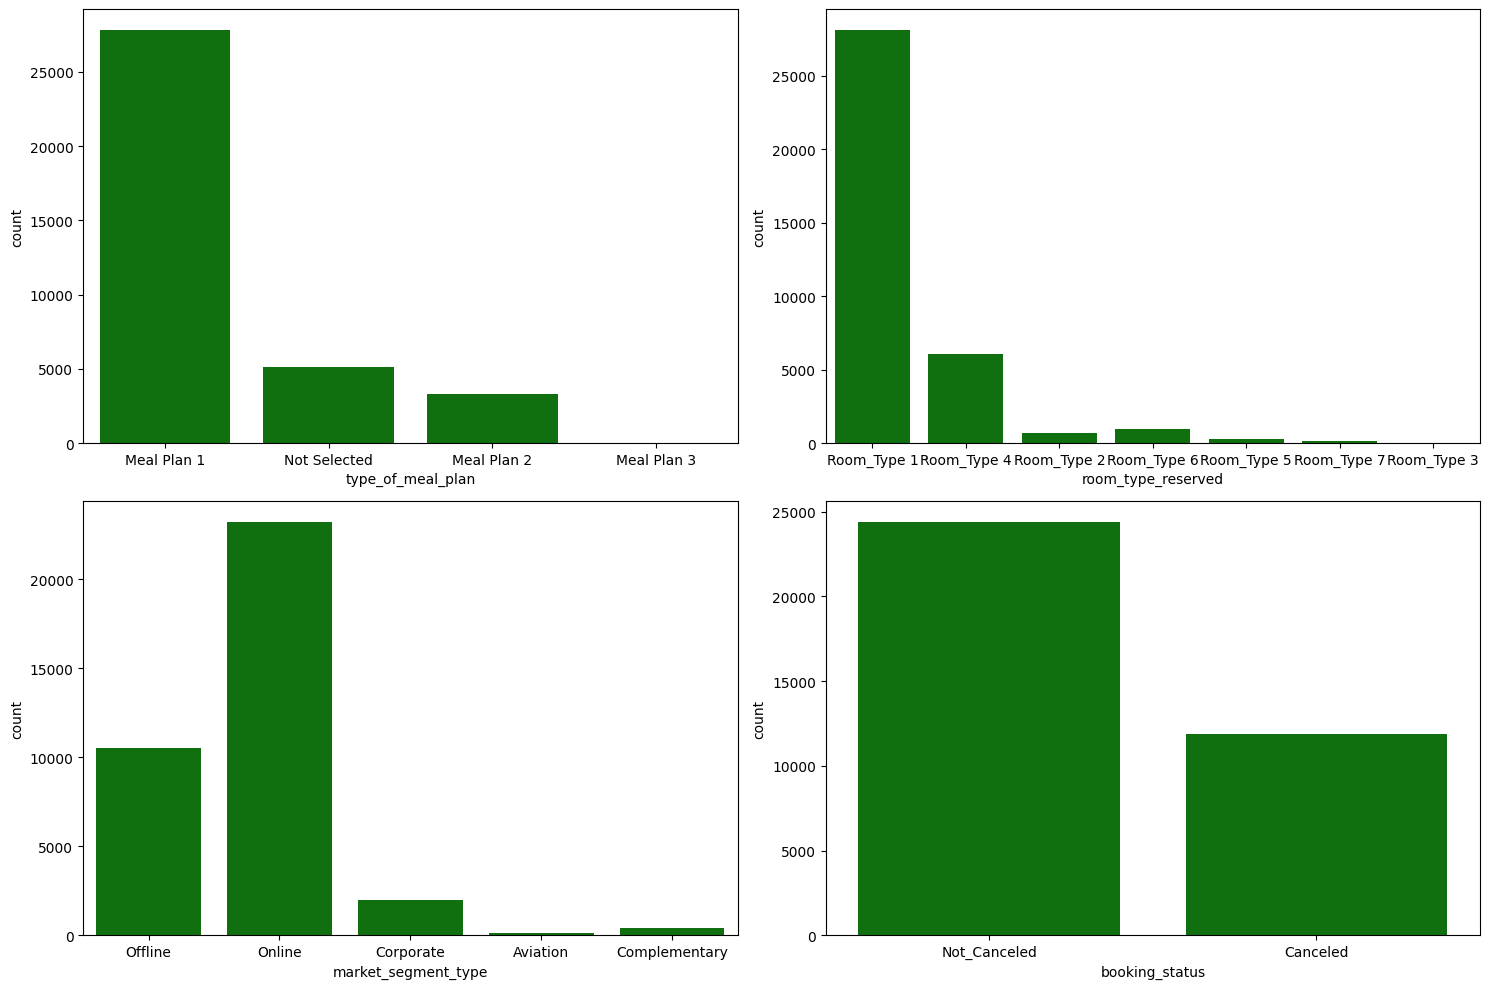

In [29]:
# Let's find count plot of all the categorical columns
plt.figure(figsize=(15,10))
index=0
for col in obj_cols[1:]:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col], color='Green')
    plt.tight_layout()
plt.show()